# LPL选手S6-S14 BO5情况统计

## Data Loading 

In [2]:
import pandas as pd

In [3]:
lpl_df_original = pd.read_csv("all_players_matchlist_S6_S14.csv", index_col=False)
lpl_df_original.head(5)

,Champion,Result,Score,Build,Duration,Date,Game,Tournament,Player Name,Player ID,Season,Split
0,Akali,Defeat,2/3/4,NaN,30:41,2022-06-16,Rare Atom vs OMG,LPL Summer 2022,909,4768,S12,Summer
1,Lissandra,Victory,2/0/7,NaN,29:29,2022-06-16,Rare Atom vs OMG,LPL Summer 2022,909,4768,S12,Summer
2,Lissandra,Defeat,1/4/3,NaN,37:05,2022-06-16,Rare Atom vs OMG,LPL Summer 2022,909,4768,S12,Summer
3,Ahri,Defeat,3/2/3,NaN,29:27,2024-03-24,EDG vs JD Gaming,LPL Spring 2024,909,4768,S14,Spring
4,Ahri,Defeat,1/2/3,NaN,27:02,2024-03-24,EDG vs JD Gaming,LPL Spring 2024,909,4768,S14,Spring


In [4]:
lpl_df_cleaned = lpl_df_original.drop(columns=["Build","Season","Split"])
lpl_df_cleaned["Type"] = "LPL"
lpl_df_cleaned.dtypes

Champion       object
Result         object
Score          object
Duration       object
Date           object
Game           object
Tournament     object
Player Name    object
Player ID       int64
Type           object
dtype: object

In [5]:
worlds_df_original = pd.read_csv("all_players_matchlist_worlds.csv", index_col=False)
worlds_df_original.head(5)

,Champion,Result,Score,Build,Duration,Date,Game,Tournament,Player Name,Player ID
0,Ornn,Defeat,1/2/10,NaN,42:11,2020-10-25,Top Esports vs Suning,World Championship 2020,369,1922
1,Renekton,Defeat,0/3/3,NaN,39:41,2020-10-25,Top Esports vs Suning,World Championship 2020,369,1922
2,Gangplank,Victory,5/1/4,NaN,33:54,2020-10-25,Top Esports vs Suning,World Championship 2020,369,1922
3,Jayce,Defeat,2/4/0,NaN,29:40,2020-10-25,Top Esports vs Suning,World Championship 2020,369,1922
4,Vladimir,Victory,1/2/1,NaN,25:22,2020-10-17,Top Esports vs Fnatic,World Championship 2020,369,1922


In [6]:
non_lpl = lpl_df_cleaned[~lpl_df_original["Tournament"].str.contains('LPL|Demacia|World Cup', case=False, na=False)]
non_lpl = non_lpl[~non_lpl["Tournament"].isin(worlds_df_original["Tournament"].unique())]
non_lpl.head()


,Champion,Result,Score,Duration,Date,Game,Tournament,Player Name,Player ID,Type
4280,Wukong,Defeat,1/5/4,27:26,2021-08-08,GEN vs DWG KIA,LCK Summer 2021,Burdol,4119,LPL
4281,Wukong,Defeat,3/4/2,30:24,2021-08-06,T1 vs GEN,LCK Summer 2021,Burdol,4119,LPL
4282,Irelia,Victory,10/2/4,31:08,2021-08-06,T1 vs GEN,LCK Summer 2021,Burdol,4119,LPL
4283,Irelia,Defeat,3/5/4,36:30,2021-08-06,T1 vs GEN,LCK Summer 2021,Burdol,4119,LPL
4284,Irelia,Victory,8/4/3,34:09,2021-07-30,KT Rolster vs GEN,LCK Summer 2021,Burdol,4119,LPL


In [7]:
lpl_df_cleaned.loc[
    lpl_df_cleaned.index.isin(non_lpl.index), "Type"
] = "Other"

In [8]:
lpl_df_cleaned.loc[
    lpl_df_cleaned["Tournament"].str.contains("World Cup"), "Type"
] = "WC"

In [9]:
lpl_df_cleaned.loc[
    lpl_df_cleaned["Tournament"].str.contains("Demacia"), "Type"
] = "DC"

In [450]:
worlds_df_original["Tournament"].unique().size

23

In [451]:
worlds_df_original["Tournament"].unique()

array(['World Championship 2020', 'Mid-Season Cup 2020',
       'World Championship 2022', 'Worlds Main Event 2023', 'MSI 2023',
       'Worlds Main Event 2024', 'MSI 2024', 'World Championship 2021',
       'World Championship Play-In 2021', 'MSI 2022',
       'World Championship Play-In 2022', 'World Championship 2019',
       'MSI 2021', 'World Championship 2018',
       'Mid-Season Invitational 2019', 'World Championship Play-In 2020',
       'World Championship 2017', 'Mid-Season Invitational 2018',
       'World Championship 2016', 'World Championship Play-In 2018',
       'MSI Play-In 2019', 'Worlds Play-In 2023',
       'Mid-Season Invitational 2016'], dtype=object)

一共有23个世界级比赛项目

In [10]:
worlds_df_cleaned = worlds_df_original.drop(columns=["Build"])
worlds_df_cleaned["Type"] = "Worlds"

In [11]:
merged_table = pd.concat([lpl_df_cleaned, worlds_df_cleaned], ignore_index=True)
merged_table["Date"] = pd.to_datetime(merged_table["Date"])
merged_table["Duration"] = pd.to_timedelta('00:' + merged_table["Duration"])
merged_table.head(5)

,Champion,Result,Score,Duration,Date,Game,Tournament,Player Name,Player ID,Type
0,Akali,Defeat,2/3/4,0 days 00:30:41,2022-06-16,Rare Atom vs OMG,LPL Summer 2022,909,4768,LPL
1,Lissandra,Victory,2/0/7,0 days 00:29:29,2022-06-16,Rare Atom vs OMG,LPL Summer 2022,909,4768,LPL
2,Lissandra,Defeat,1/4/3,0 days 00:37:05,2022-06-16,Rare Atom vs OMG,LPL Summer 2022,909,4768,LPL
3,Ahri,Defeat,3/2/3,0 days 00:29:27,2024-03-24,EDG vs JD Gaming,LPL Spring 2024,909,4768,LPL
4,Ahri,Defeat,1/2/3,0 days 00:27:02,2024-03-24,EDG vs JD Gaming,LPL Spring 2024,909,4768,LPL


In [12]:
merged_table.loc[merged_table["Player Name"] == "909", "Player Name"] = "0909"


In [13]:
# repeated lines 
merged_table[merged_table["Player Name"] == "Elk"].sort_values(by=["Date"]).tail(2)

,Champion,Result,Score,Duration,Date,Game,Tournament,Player Name,Player ID,Type
39415,Ashe,Victory,8/1/5,0 days 00:27:09,2024-11-02,BLG vs T1,Worlds Main Event 2024,Elk,2376,Worlds
8037,Ashe,Victory,8/1/5,0 days 00:27:09,2024-11-02,BLG vs T1,Worlds Main Event 2024,Elk,2376,LPL


In [14]:
merged_table = merged_table[~((merged_table.duplicated(subset=merged_table.columns[:-1], keep=False)) & (merged_table["Type"] == "LPL"))]
merged_table.size

389130

In [15]:
all_game_df = merged_table

In [16]:
lpl_world_game_df = all_game_df[(all_game_df["Type"] == "LPL") | (all_game_df["Type"] == "Worlds")]

lpl_world_game_df.head()

,Champion,Result,Score,Duration,Date,Game,Tournament,Player Name,Player ID,Type
0,Akali,Defeat,2/3/4,0 days 00:30:41,2022-06-16,Rare Atom vs OMG,LPL Summer 2022,0909,4768,LPL
1,Lissandra,Victory,2/0/7,0 days 00:29:29,2022-06-16,Rare Atom vs OMG,LPL Summer 2022,0909,4768,LPL
2,Lissandra,Defeat,1/4/3,0 days 00:37:05,2022-06-16,Rare Atom vs OMG,LPL Summer 2022,0909,4768,LPL
3,Ahri,Defeat,3/2/3,0 days 00:29:27,2024-03-24,EDG vs JD Gaming,LPL Spring 2024,0909,4768,LPL
4,Ahri,Defeat,1/2/3,0 days 00:27:02,2024-03-24,EDG vs JD Gaming,LPL Spring 2024,0909,4768,LPL


In [17]:
lpl_world_game_df = lpl_world_game_df[["Date","Game","Type"]].drop_duplicates().sort_values(by=["Date"])

In [18]:
player_list_df = pd.read_csv("extracted_player_links.csv", index_col=False)
player_list_df.head(5)

,Player Name,Hyperlink
0,909,https://gol.gg/players/player-stats/4768/seaso...
1,1xn,https://gol.gg/players/player-stats/5177/seaso...
2,369,https://gol.gg/players/player-stats/1922/seaso...
3,AKi,https://gol.gg/players/player-stats/3298/seaso...
4,Able,https://gol.gg/players/player-stats/1266/seaso...


In [19]:
player_list = player_list_df["Player Name"].to_list()
player_list[0] = "0909"

In [463]:
len(player_list)

118

## BO5 filters 

In [20]:
merged_table.columns

Index(['Champion', 'Result', 'Score', 'Duration', 'Date', 'Game', 'Tournament',
       'Player Name', 'Player ID', 'Type'],
      dtype='object')

In [21]:
all_BO5_df_groupby = merged_table.groupby(["Player Name","Date","Game","Tournament","Type"])["Result"].value_counts().unstack(fill_value=0).reset_index()

all_BO5_match_df = all_BO5_df_groupby[(all_BO5_df_groupby["Defeat"] == 3) | (all_BO5_df_groupby["Victory"] == 3)]

In [22]:
#BO5_match_df.drop(columns=["Result"])
all_BO5_match_df.columns.name = None

In [23]:
all_BO5_match_df.head(5)

,Player Name,Date,Game,Tournament,Type,Defeat,Victory
49,1xn,2024-08-05,OMG vs TT,LPL Summer Playoffs 2024,LPL,0,3
50,1xn,2024-08-11,FPX vs TT,LPL Summer Playoffs 2024,LPL,3,2
65,369,2019-04-07,TOP vs SDG,LPL Spring Playoffs 2019,LPL,0,3
83,369,2019-09-01,Top Esports vs RNG,LPL Summer Playoffs 2019,LPL,3,1
84,369,2019-09-04,BLG vs Top Esports,LPL Summer Playoffs 2019,LPL,0,3


In [24]:
all_BO5_match_df[["Date","Game"]].drop_duplicates().sort_values(by=["Date"])

,Date,Game
3424,2016-04-15,EDG vs Snake
3688,2016-04-15,Taipei Assassins vs Machi
15661,2016-04-17,Royal-NG vs Team WE
14979,2016-04-23,Royal-NG vs EDG
15673,2016-05-13,RNG vs SKT T1
...,...,...
1727,2024-10-17,LNG Esports vs WBG
1487,2024-10-18,HLE vs BLG
320,2024-10-19,Top Esports vs T1
1488,2024-10-26,WBG vs BLG


In [25]:
all_BO5_game_df = all_BO5_match_df.merge(merged_table, on = ["Player Name", "Date", "Game", "Tournament", "Type"])
all_BO5_game_df.head()

,Player Name,Date,Game,Tournament,Type,Defeat,Victory,Champion,Result,Score,Duration,Player ID
0,1xn,2024-08-05,OMG vs TT,LPL Summer Playoffs 2024,LPL,0,3,Ezreal,Victory,4/0/5,0 days 00:25:01,5177
1,1xn,2024-08-05,OMG vs TT,LPL Summer Playoffs 2024,LPL,0,3,Miss Fortune,Victory,5/0/8,0 days 00:23:20,5177
2,1xn,2024-08-05,OMG vs TT,LPL Summer Playoffs 2024,LPL,0,3,Smolder,Victory,2/1/9,0 days 00:26:22,5177
3,1xn,2024-08-11,FPX vs TT,LPL Summer Playoffs 2024,LPL,3,2,Varus,Defeat,0/2/7,0 days 00:30:32,5177
4,1xn,2024-08-11,FPX vs TT,LPL Summer Playoffs 2024,LPL,3,2,Miss Fortune,Victory,2/0/6,0 days 00:41:31,5177


In [26]:
lpl_world_bo5_game_df = all_BO5_game_df[(all_BO5_game_df["Type"] == "LPL") | (all_BO5_game_df["Type"] == "Worlds")]

## Which Players have Never Joined a BO5?

In [120]:
BO5_player_list = all_BO5_match_df["Player Name"].unique()
players_without_bo5 = [player for player in player_list if player not in BO5_player_list]
print(players_without_bo5)

['0909', 'Decade', 'Fisher', 'Geju', 'Juice', 'Kepler', 'Linfeng', 'Monki', 'Moyan', 'Niket', 'Qingtian', 'TheNiu', 'Thesnake', 'XBY', 'XBear', 'XZZ', 'Yanxiang', 'Youdang', 'ZUIAN']


In [121]:
len(players_without_bo5)

19

In [311]:
earlist_matches = all_game_df.groupby("Player Name")["Date"].min().reset_index()
form = pd.merge(earlist_matches, merged_table, on=["Player Name", "Date"], how="left")
earlist = form[["Player Name", "Date", "Tournament"]].drop_duplicates()
earlist.columns = ["姓名","生涯首出场日期","生涯首出场赛事"]
earliest_in_career = earlist[earlist["姓名"].isin(players_without_bo5)]
earliest_in_career

,姓名,生涯首出场日期,生涯首出场赛事
0,0909,2022-06-16,LPL Summer 2022
46,Decade,2021-12-17,Demacia Cup 2021
54,Fisher,2022-06-28,LCK CL Summer 2022
65,Geju,2020-12-21,Demacia Cup 2020
92,Juice,2024-06-14,LPL Summer Placements 2024
99,Kepler,2020-12-21,Demacia Cup 2020
118,Linfeng,2024-03-20,LPL Spring 2024
133,Monki,2023-12-26,Demacia Cup 2023
136,Moyan,2021-12-17,Demacia Cup 2021
140,Niket,2024-06-01,LPL Summer Placements 2024


In [ ]:
lpl_world_game_df

In [317]:
# Find the earliest match date for each player
earliest_matches_in_lpl = lpl_world_game_df.groupby("Player Name")["Date"].min().reset_index()

# Merge back to the original DataFrame to get full details of the earliest matches
form = pd.merge(earliest_matches_in_lpl, lpl_world_game_df, on=["Player Name", "Date"], how="left")

array(['LPL', 'Worlds'], dtype=object)

In [324]:
earlist_in_lpl = form[["Player Name", "Date", "Game", "Tournament"]].drop_duplicates()
# earlist.columns = ["姓名","日期","场次","赛事"]
earlist_in_lpl.head()
earlist = earlist_in_lpl.merge(earliest_in_career, left_on="Player Name", right_on="姓名").drop(18)
earlist.drop(columns=["姓名"]).rename(columns={"Player Name":"选手姓名","Date":"LPL首出场日期","Game":"LPL首出场场次","Tournament":"LPL首出场赛事"})



,选手姓名,LPL首出场日期,LPL首出场场次,LPL首出场赛事,生涯首出场日期,生涯首出场赛事
0,0909,2022-06-16,Rare Atom vs OMG,LPL Summer 2022,2022-06-16,LPL Summer 2022
1,Decade,2023-06-14,WBG vs LGD Gaming,LPL Summer 2023,2021-12-17,Demacia Cup 2021
2,Fisher,2023-07-17,WBG vs EDG,LPL Summer 2023,2022-06-28,LCK CL Summer 2022
3,Geju,2024-07-05,EDG vs RNG,LPL Summer Season 2024,2020-12-21,Demacia Cup 2020
4,Juice,2024-06-14,RNG vs LGD Gaming,LPL Summer Placements 2024,2024-06-14,LPL Summer Placements 2024
5,Kepler,2021-06-09,LNG Esports vs V5,LPL Summer 2021,2020-12-21,Demacia Cup 2020
6,Linfeng,2024-03-20,OMG vs BLG,LPL Spring 2024,2024-03-20,LPL Spring 2024
7,Monki,2024-02-25,EDG vs AL,LPL Spring 2024,2023-12-26,Demacia Cup 2023
8,Moyan,2022-01-10,OMG vs TT,LPL Spring 2022,2021-12-17,Demacia Cup 2021
9,Niket,2024-06-01,Ultra Prime vs IG,LPL Summer Placements 2024,2024-06-01,LPL Summer Placements 2024


In [140]:
earlist.columns = ["姓名","LPL首出场日期","首出场场次","赛事"]
earlist[earlist["姓名"].isin(players_without_bo5)].drop(210)

,姓名,LPL首出场日期,首出场场次,赛事
0,0909,2022-06-16,Rare Atom vs OMG,LPL Summer 2022
43,Decade,2023-06-14,WBG vs LGD Gaming,LPL Summer 2023
49,Fisher,2023-07-17,WBG vs EDG,LPL Summer 2023
57,Geju,2024-07-05,EDG vs RNG,LPL Summer Season 2024
81,Juice,2024-06-14,RNG vs LGD Gaming,LPL Summer Placements 2024
88,Kepler,2021-06-09,LNG Esports vs V5,LPL Summer 2021
105,Linfeng,2024-03-20,OMG vs BLG,LPL Spring 2024
120,Monki,2024-02-25,EDG vs AL,LPL Spring 2024
122,Moyan,2022-01-10,OMG vs TT,LPL Spring 2022
124,Niket,2024-06-01,Ultra Prime vs IG,LPL Summer Placements 2024


In [105]:
merged_table[merged_table["Player Name"].isin(players_without_bo5)].Tournament.unique()

array(['LPL Summer 2022', 'LPL Spring 2024', 'Demacia Cup 2021',
       'LPL Summer 2023', 'LCK CL Summer 2022', 'Demacia Cup 2023',
       'LCK Summer 2024', 'Demacia Cup 2020', 'LPL Summer Season 2024',
       'LPL Summer Placements 2024', 'LPL Summer 2021', 'LPL Spring 2022',
       'LPL Summer Playoffs 2022', 'LPL Spring 2023', 'LMS Spring 2019',
       'LMS Summer 2019', 'LPL Summer 2018', 'LPL Summer 2019',
       'LPL Summer 2020'], dtype=object)

In [29]:
all_BO5_match_df
lpl_world_bo5_match_df = all_BO5_match_df[(all_BO5_match_df["Type"] == "LPL") | (all_BO5_match_df["Type"] == "Worlds")]

In [148]:
lpl_BO5_player_list = lpl_world_bo5_match_df["Player Name"].unique()
players_without_lpl_bo5 = [player for player in player_list if player not in lpl_BO5_player_list]
print(players_without_lpl_bo5)

['0909', 'Decade', 'Fisher', 'Geju', 'Juice', 'Kepler', 'Linfeng', 'Monki', 'Moyan', 'Niket', 'Prince', 'Qingtian', 'Solokill', 'TheNiu', 'Thesnake', 'Wen', 'XBY', 'XBear', 'XZZ', 'Xiamu', 'Yanxiang', 'Youdang', 'Yuekai', 'ZUIAN', 'Zorah', 'naiyou', 'sheer', 'xiaoyueji']


In [149]:
len(players_without_lpl_bo5)

28

In [150]:
set(players_without_lpl_bo5) - set(players_without_bo5)

{'Prince',
 'Solokill',
 'Wen',
 'Xiamu',
 'Yuekai',
 'Zorah',
 'naiyou',
 'sheer',
 'xiaoyueji'}

In [152]:
earlist.columns = ["姓名","LPL首出场日期","首出场场次","赛事"]
earlist[earlist["姓名"].isin(list(set(players_without_lpl_bo5) - set(players_without_bo5)))]

,姓名,LPL首出场日期,首出场场次,赛事
133,Prince,2024-01-23,OMG vs Team WE,LPL Spring 2024
153,Solokill,2024-01-30,LGD Gaming vs EDG,LPL Spring 2024
181,Wen,2023-06-14,EDG vs IG,LPL Summer 2023
194,Xiamu,2024-02-29,EDG vs OMG,LPL Spring 2024
211,Yuekai,2016-03-11,Royal-NG vs E-Pacemaker,LPL Spring 2016
222,Zorah,2022-01-12,Rare Atom vs Top Esports,LPL Spring 2022
236,naiyou,2024-01-25,WBG vs Rare Atom,LPL Spring 2024
243,sheer,2024-03-07,JD Gaming vs Ultra Prime,LPL Spring 2024
249,xiaoyueji,2022-01-13,IG vs TT,LPL Spring 2022


## BO5 总时长

In [273]:
BO5_duration_sum = lpl_world_bo5_game_df.groupby("Player Name")["Duration"].sum().reset_index()
# BO5_duration_sum.sort_values(by="Duration", ascending=False).head(30)
sum = BO5_duration_sum["Duration"].apply(convert_to_hours).sum()
BO5_duration_sum["Percentage"] = BO5_duration_sum["Duration"].apply(convert_to_hours)/sum
BO5_duration_sum.sort_values(by="Duration", ascending=False).head(30)


,Player Name,Duration,Percentage
89,xiaohu,6 days 07:10:12,0.044615
84,meiko,5 days 19:09:52,0.041072
32,JackeyLove,5 days 04:58:29,0.036884
54,Scout,5 days 01:33:14,0.035875
37,Knight,4 days 23:46:59,0.035352
76,Yagao,4 days 12:14:57,0.031948
52,RooKie,4 days 11:00:02,0.031580
62,Tian,4 days 09:33:41,0.031155
1,369,4 days 08:18:37,0.030786
9,Bin,4 days 06:08:36,0.030146


In [267]:
BO5_duration_sum.sort_values(by="Duration", ascending=False).head(30)["Duration"].apply(convert_to_hours).sum()/BO5_duration_sum["Duration"].apply(convert_to_hours).sum()

0.7615659702122453

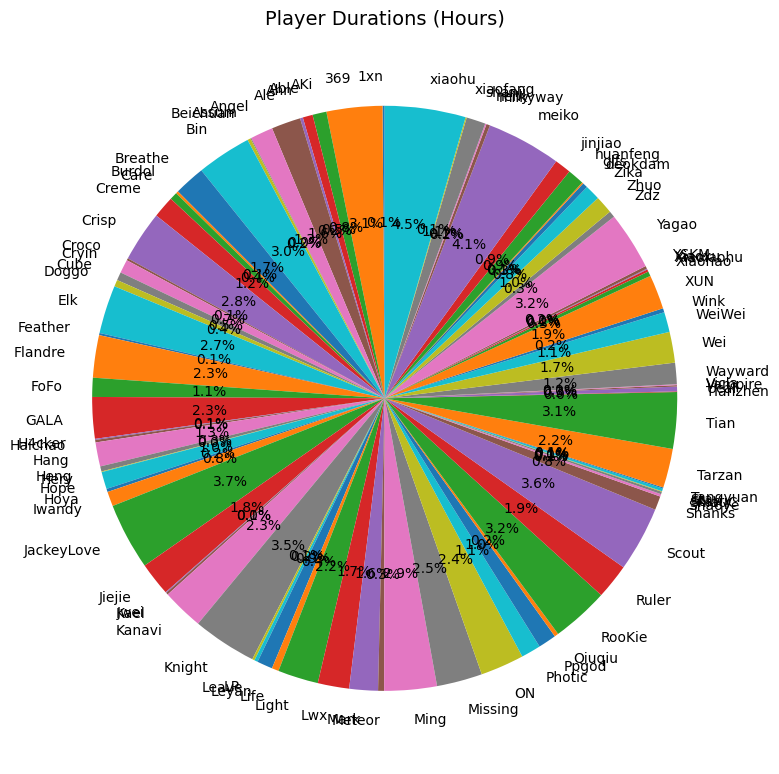

In [270]:
df = BO5_duration_sum
def convert_to_hours(time_delta):
    time_delta = pd.to_timedelta(time_delta)
    return time_delta.total_seconds() / 3600  # Convert seconds to hours

df["Duration (hours)"] = df["Duration"].apply(convert_to_hours)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    df["Duration (hours)"],
    labels=df["Player Name"],
    autopct="%1.1f%%",
    startangle=90,
    textprops={"fontsize": 10}
)

# Add title
plt.title("Player Durations (Hours)", fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

In [277]:
earliest_bo5_matches_in_lpl = lpl_world_bo5_game_df.groupby("Player Name")["Date"].min().reset_index()
earliest_bo5_matches_in_lpl
# Merge back to the original DataFrame to get full details of the earliest matches
form = pd.merge(earliest_bo5_matches_in_lpl, merged_table, on=["Player Name", "Date"], how="left")

earlist = form[["Player Name", "Date", "Game", "Tournament"]].drop_duplicates()
earlist


top_bo5_duration_player_df = BO5_duration_sum.merge(earlist, how="inner", on="Player Name").sort_values(by="Duration", ascending=False).head(30)
top_bo5_duration_player_df = top_bo5_duration_player_df.drop(columns=["Percentage"])

top_bo5_duration_player_df.columns = ["姓名","总长","LPLBO5首出场日期","首出场场次","赛事"]
top_bo5_duration_player_df

,姓名,总长,LPLBO5首出场日期,首出场场次,赛事
89,xiaohu,6 days 07:10:12,2016-04-17,Royal-NG vs Team WE,LPL Spring Playoffs 2016
84,meiko,5 days 19:09:52,2016-04-15,EDG vs Snake,LPL Spring Playoffs 2016
32,JackeyLove,5 days 04:58:29,2018-04-21,IG vs RNG,LPL Spring Playoffs 2018
54,Scout,5 days 01:33:14,2016-08-14,EDG vs Team WE,LPL Summer Playoffs 2016
37,Knight,4 days 23:46:59,2019-04-07,TOP vs SDG,LPL Spring Playoffs 2019
76,Yagao,4 days 12:14:57,2018-09-08,EDG vs JD Gaming,LPL Summer Playoffs 2018
52,RooKie,4 days 11:00:02,2017-04-18,Newbee vs IG,LPL Spring Playoffs 2017
62,Tian,4 days 09:33:41,2019-04-17,FPX vs TOP,LPL Spring Playoffs 2019
1,369,4 days 08:18:37,2019-04-07,TOP vs SDG,LPL Spring Playoffs 2019
9,Bin,4 days 06:08:36,2020-08-15,Suning vs V5,LPL Summer Playoffs 2020


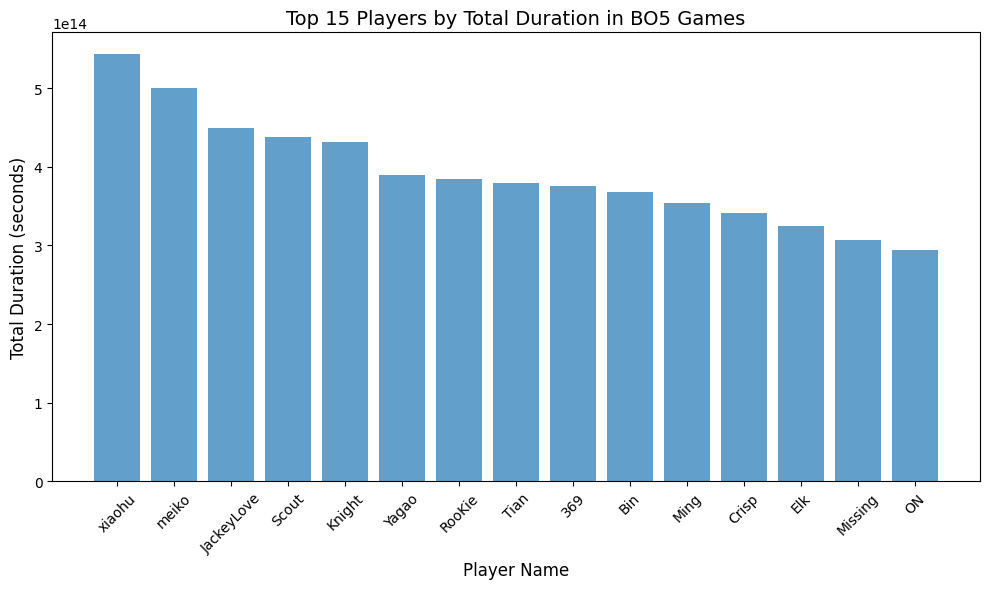

In [217]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(top_bo5_duration_player_df["姓名"], top_bo5_duration_player_df["总长"], alpha=0.7)
plt.title("Top 15 Players by Total Duration in BO5 Games", fontsize=14)
plt.xlabel("Player Name", fontsize=12)
plt.ylabel("Total Duration (seconds)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

In [182]:
year_to_season = {
    2024: 'S14',
    2023: 'S13',
    2022: 'S12',
    2021: 'S11',
    2020: 'S10',
    2019: 'S9',
    2018: 'S8',
    2017: 'S7',
    2016: 'S6'
}

# Extract the year from the Date column and map it to the season name
lpl_world_bo5_game_df['Season'] = lpl_world_bo5_game_df['Date'].dt.year.map(year_to_season)



C:\Users\Yangge Xu\AppData\Local\Temp\ipykernel_5484\3366793911.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lpl_world_bo5_game_df['Season'] = lpl_world_bo5_game_df['Date'].dt.year.map(year_to_season)


In [250]:
BO5_duration_sum_by_year = (
    lpl_world_bo5_game_df.groupby(["Player Name", "Season"])["Duration"]
    .sum()
    .unstack()
)

# Optional: Reset the column names for better presentation
BO5_duration_sum_by_year.columns.name = None  # Removes 'Season' as the column group name
BO5_duration_sum_by_year.index.name = None    # Removes 'Player Name' as the index group name
BO5_duration_sum_by_year.index

merged = top_bo5_duration_player_df.head(10).merge(BO5_duration_sum_by_year, how="inner", left_on="姓名", right_on=BO5_duration_sum_by_year.index)

In [281]:
BO5_duration_sum_by_year = (
    lpl_world_bo5_game_df.groupby(["Player Name", "Season"])["Duration"]
    .sum()
    .reset_index()
)
BO5_duration_sum_by_year
top_BO5_duration_sum_by_year_df = BO5_duration_sum_by_year[BO5_duration_sum_by_year["Player Name"].isin(top_bo5_duration_player_df["姓名"][:20])]

In [282]:
df_long = top_BO5_duration_sum_by_year_df
df_long["Duration"] = df_long["Duration"].apply(convert_to_hours)
df_long.head()

C:\Users\Yangge Xu\AppData\Local\Temp\ipykernel_5484\4152812509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long["Duration"] = df_long["Duration"].apply(convert_to_hours)


,Player Name,Season,Duration
1,369,S10,19.956111
2,369,S11,8.976944
3,369,S12,19.275556
4,369,S13,23.759722
5,369,S14,24.422500


C:\Users\Yangge Xu\AppData\Local\Temp\ipykernel_5484\3223308749.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long["Season"] = pd.Categorical(df_long["Season"], categories=season_order, ordered=True)


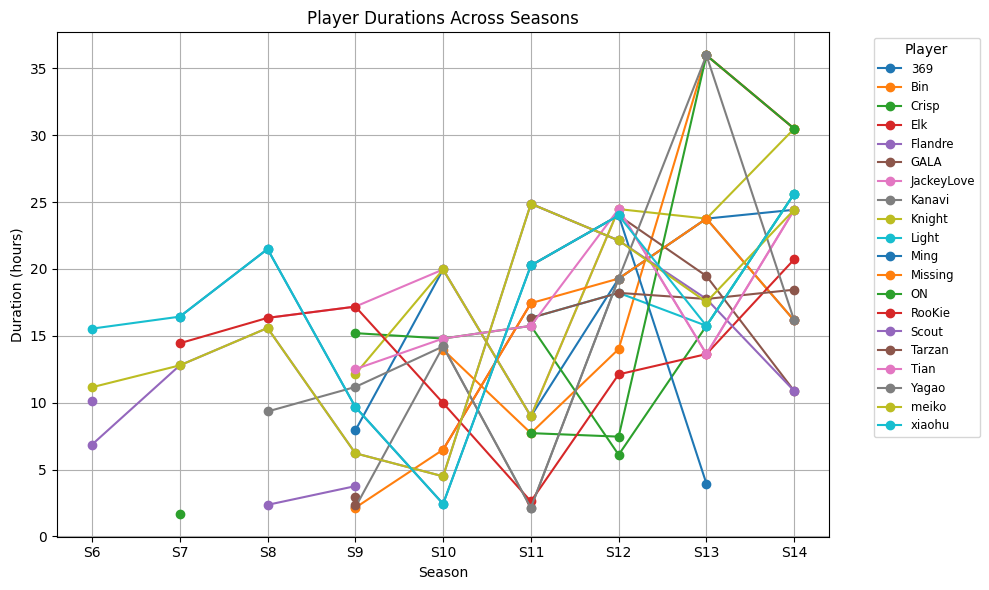

In [283]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the season order explicitly
season_order = ["S6", "S7", "S8", "S9", "S10", "S11", "S12", "S13", "S14"]

# Ensure the "Season" column is categorical and ordered
df_long["Season"] = pd.Categorical(df_long["Season"], categories=season_order, ordered=True)

# Pivot the table to align seasons as columns for each player (ensuring correct alignment)
pivoted_df = df_long.pivot(index="Player Name", columns="Season", values="Duration")

# Reset index for easier plotting
pivoted_df.reset_index(inplace=True)

# Plot each player's data
plt.figure(figsize=(10, 6))
for _, row in pivoted_df.iterrows():
    player_name = row["Player Name"]
    durations = row[season_order]  # Extract durations in correct season order
    plt.plot(season_order, durations, label=player_name, marker="o")

# Add chart details
plt.xlabel("Season")
plt.ylabel("Duration (hours)")
plt.title("Player Durations Across Seasons")
plt.legend(title="Player", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


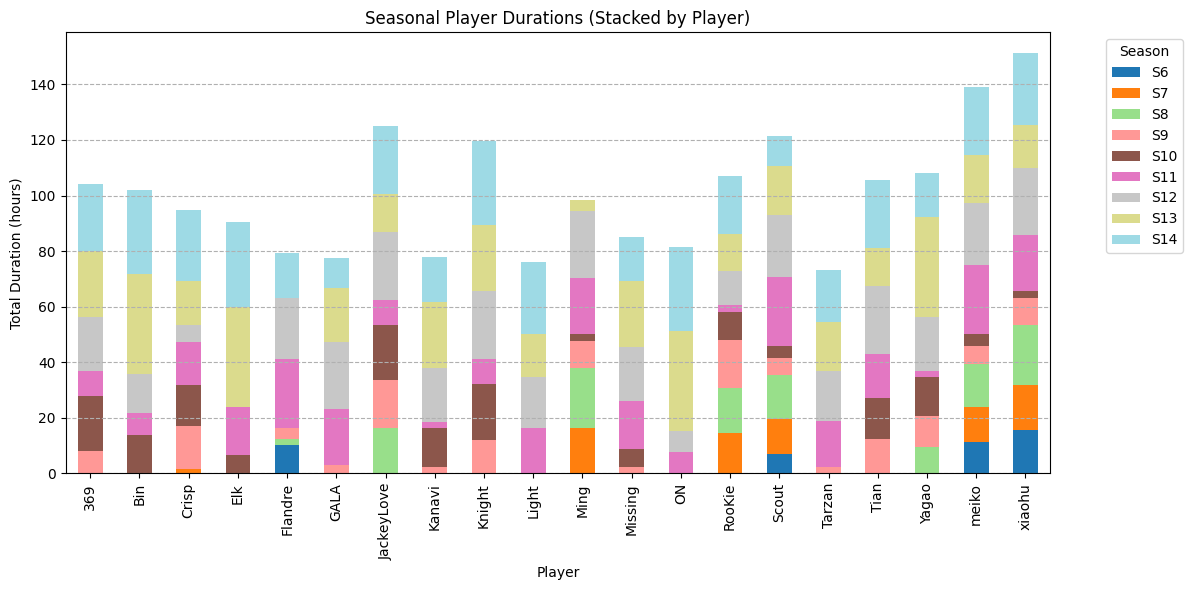

In [284]:
# 转换数据为堆叠柱状图格式，每个 Player 是一个堆叠条
pivoted_df_reversed = df_long.pivot(index="Player Name", columns="Season", values="Duration").fillna(0)

# 创建堆叠柱状图
pivoted_df_reversed.plot(kind="bar", stacked=True, figsize=(12, 6), cmap="tab20")

# 添加图表细节
plt.xlabel("Player")
plt.ylabel("Total Duration (hours)")
plt.title("Seasonal Player Durations (Stacked by Player)")
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--")
plt.tight_layout()

# 显示图表
plt.show()


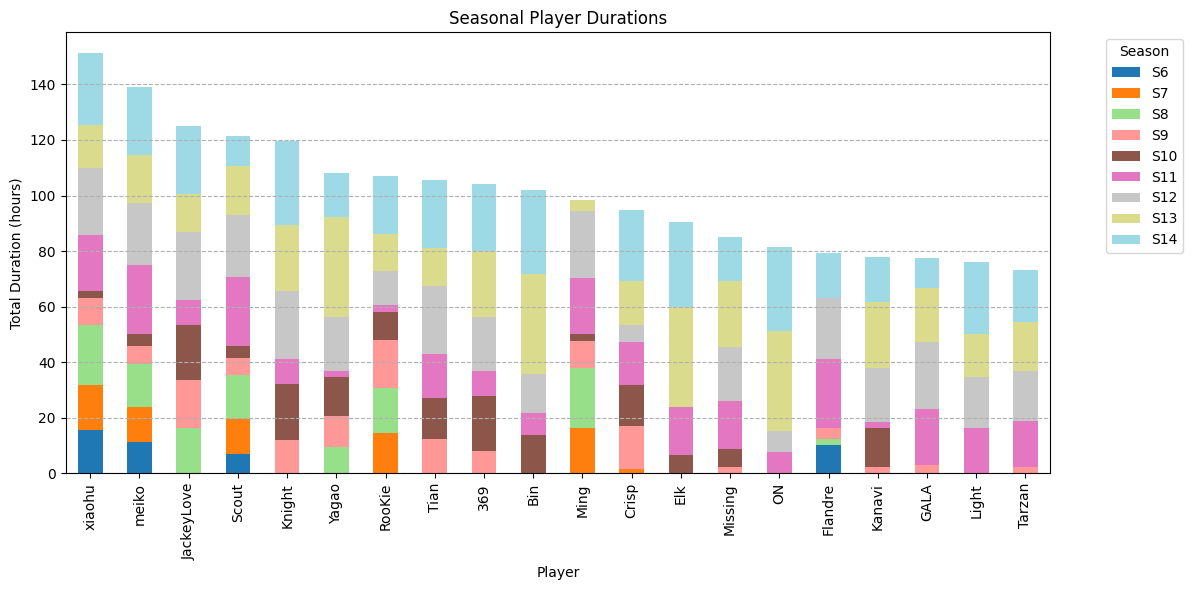

In [291]:
# 计算每个玩家的总时长并排序
pivoted_df_reversed["Total Duration"] = pivoted_df_reversed.sum(axis=1)
pivoted_df_sorted = pivoted_df_reversed.sort_values(by="Total Duration", ascending=False).drop(columns=["Total Duration"])

# 创建堆叠柱状图
pivoted_df_sorted.plot(kind="bar", stacked=True, figsize=(12, 6), cmap="tab20")

# 添加图表细节
plt.xlabel("Player")
plt.ylabel("Total Duration (hours)")
plt.title("Seasonal Player Durations")
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--")
plt.tight_layout()

# 显示图表
plt.show()


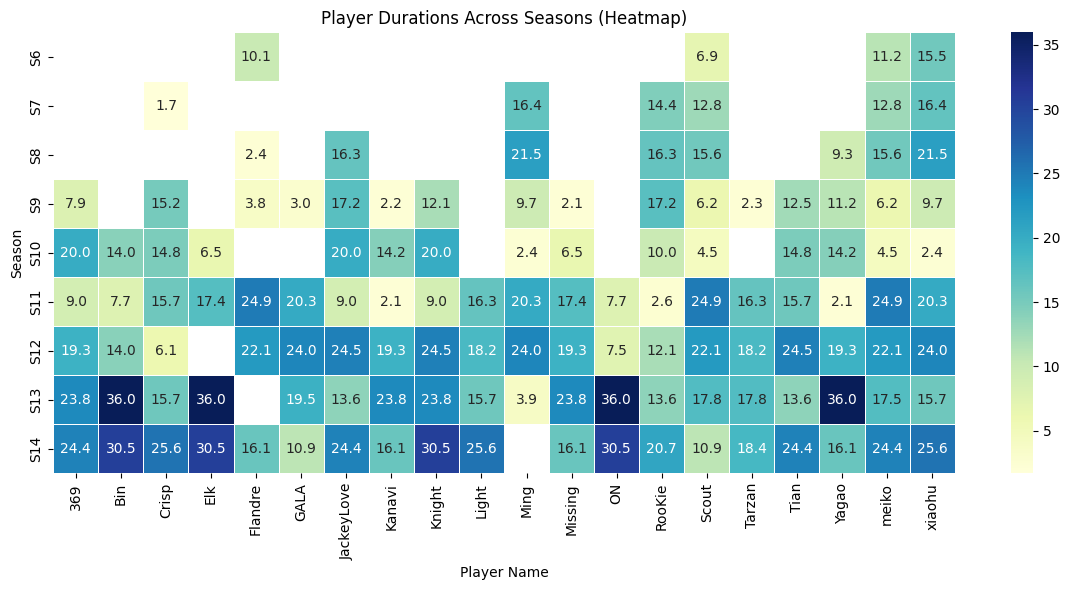

In [287]:
import seaborn as sns

pivoted_df = df_long.pivot(index="Season", columns="Player Name", values="Duration")

# 创建热力图
plt.figure(figsize=(12, 6))
sns.heatmap(pivoted_df, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)

# 添加图表细节
plt.ylabel("Season")
plt.xlabel("Player Name")
plt.title("Player Durations Across Seasons (Heatmap)")
plt.tight_layout()

# 显示图表
plt.show()


C:\Users\Yangge Xu\AppData\Local\Temp\ipykernel_5484\3806841591.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Season", y="Duration", data=melted_df, palette="Set3")


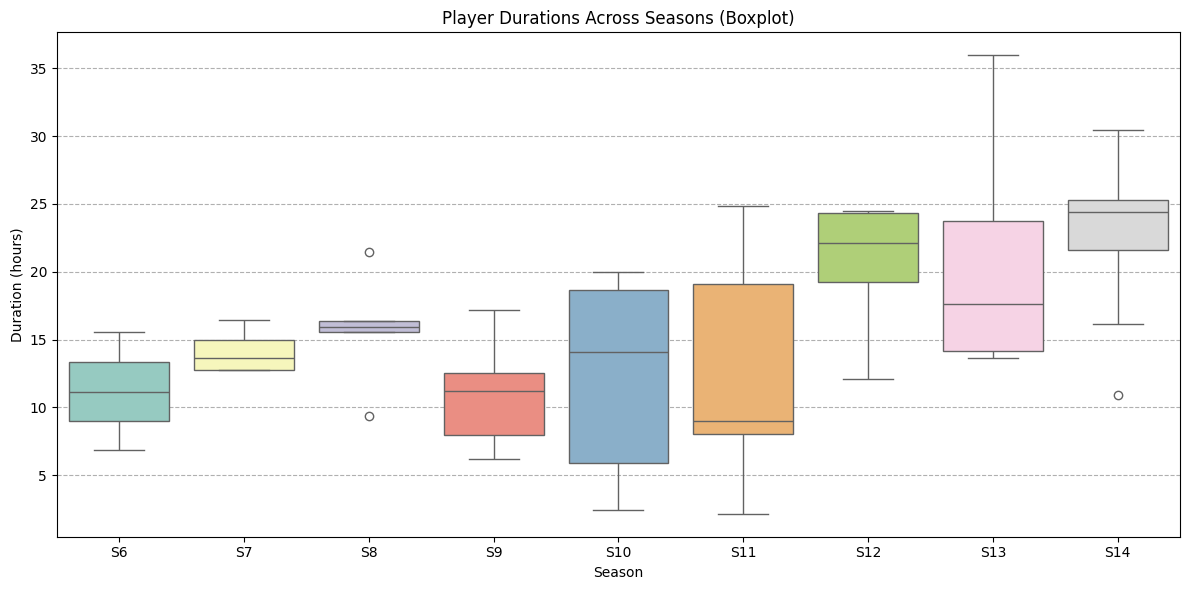

In [289]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Season", y="Duration", data=melted_df, palette="Set3")

# 添加图表细节
plt.xlabel("Season")
plt.ylabel("Duration (hours)")
plt.title("Player Durations Across Seasons (Boxplot)")
plt.grid(axis="y", linestyle="--")
plt.tight_layout()

# 显示图表
plt.show()


## 参加BO5数量以及胜率


In [ ]:
lpl_world_bo5_game_df
lpl_world_bo5_match_df

In [332]:
lpl_world_bo5_match_df["Win"] = lpl_world_bo5_match_df["Victory"].apply(lambda x: 1 if x == 3 else 0)

C:\Users\Yangge Xu\AppData\Local\Temp\ipykernel_5484\1845719425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lpl_world_bo5_match_df["Win"] = lpl_world_bo5_match_df["Victory"].apply(lambda x: 1 if x == 3 else 0)


In [331]:
lpl_world_bo5_game_df
lpl_world_bo5_game_df[["K", "D", "A"]] = lpl_world_bo5_game_df["Score"].str.split("/", expand=True)
lpl_world_bo5_game_df["K"] = pd.to_numeric(lpl_world_bo5_game_df["K"], errors="coerce")
lpl_world_bo5_game_df["D"] = pd.to_numeric(lpl_world_bo5_game_df["D"], errors="coerce")
lpl_world_bo5_game_df["A"] = pd.to_numeric(lpl_world_bo5_game_df["A"], errors="coerce")

C:\Users\Yangge Xu\AppData\Local\Temp\ipykernel_5484\2572383805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lpl_world_bo5_game_df[["K", "D", "A"]] = lpl_world_bo5_game_df["Score"].str.split("/", expand=True)
C:\Users\Yangge Xu\AppData\Local\Temp\ipykernel_5484\2572383805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lpl_world_bo5_game_df["K"] = pd.to_numeric(lpl_world_bo5_game_df["K"], errors="coerce")
C:\Users\Yangge Xu\AppData\Local\Temp\ipykernel_5484\2572383805.py:4: SettingWithCopyWarning

In [390]:
BO5_win_rate = lpl_world_bo5_match_df.groupby("Player Name")["Win"].mean().reset_index(name="Match Win Rate")
BO5_match_number = lpl_world_bo5_match_df.groupby("Player Name")["Date"].count().reset_index().rename(columns={"Date":"Number of Matches"})

BO5_match_number.sort_values("Number of Matches", ascending=False).head(30)

BO5_game_number = lpl_world_bo5_game_df.groupby("Player Name").size().reset_index(name="Number of Games")
BO5_game_number.sort_values(by="Number of Games", ascending=False)

,Player Name,Number of Games
89,xiaohu,271
84,meiko,251
32,JackeyLove,231
37,Knight,224
54,Scout,218
...,...,...
28,Hery,3
34,Jwei,3
66,Vicla,3
7,Assum,3


In [391]:
BO5_game_number.merge(BO5_duration_sum, on="Player Name").drop(columns="Percentage").sort_values("Number of Games", ascending=False)

,Player Name,Number of Games,Duration
89,xiaohu,271,6 days 07:10:12
84,meiko,251,5 days 19:09:52
32,JackeyLove,231,5 days 04:58:29
37,Knight,224,4 days 23:46:59
54,Scout,218,5 days 01:33:14
...,...,...,...
28,Hery,3,0 days 01:14:43
34,Jwei,3,0 days 01:39:12
66,Vicla,3,0 days 01:39:12
7,Assum,3,0 days 01:39:12


In [412]:
BO5_summary = BO5_game_number.merge(BO5_duration_sum, on="Player Name").drop(columns="Percentage").merge(BO5_match_number, on="Player Name").sort_values("Number of Games", ascending=False)
BO5_summary = BO5_summary.merge(BO5_win_rate, on="Player Name")
BO5_summary["Duration_minute"] = BO5_summary["Duration"].apply(convert_to_hours) * 60
BO5_summary.head(10)

,Player Name,Number of Games,Duration,Number of Matches,Match Win Rate,Duration_minute
0,xiaohu,271,6 days 07:10:12,65,0.630769,9070.200000
1,meiko,251,5 days 19:09:52,61,0.540984,8349.866667
2,JackeyLove,231,5 days 04:58:29,56,0.535714,7498.483333
3,Knight,224,4 days 23:46:59,55,0.690909,7186.983333
4,Scout,218,5 days 01:33:14,52,0.557692,7293.233333
5,Yagao,200,4 days 12:14:57,48,0.541667,6494.950000
6,RooKie,199,4 days 11:00:02,47,0.446809,6420.033333
7,369,196,4 days 08:18:37,49,0.632653,6258.616667
8,Tian,196,4 days 09:33:41,49,0.571429,6333.683333
9,Bin,191,4 days 06:08:36,48,0.687500,6128.600000


In [411]:
calc_df = BO5_summary.copy()
calc_df["avg_duration"] = calc_df["Duration_minute"] / calc_df["Number of Games"]
calc_df = calc_df[calc_df["Number of Matches"] >= 5].sort_values("avg_duration",ascending=False).drop(columns="Duration_minute")
calc_df.columns=[["姓名","小局数","总时长","大场数","大场胜率","平均小局时长(分钟)"]]
calc_df.head(15)

,姓名,小局数,总时长,大场数,大场胜率,平均小局时长(分钟)
42,jinjiao,53,1 days 06:48:25,12,0.500000,34.875786
18,Flandre,140,3 days 07:20:38,33,0.515152,34.004524
11,Ming,174,4 days 02:12:37,41,0.658537,33.865613
0,xiaohu,271,6 days 07:10:12,65,0.630769,33.469373
4,Scout,218,5 days 01:33:14,52,0.557692,33.455199
38,Hope,58,1 days 08:13:49,14,0.500000,33.341667
1,meiko,251,5 days 19:09:52,61,0.540984,33.266401
43,Iwandy,50,1 days 03:29:58,13,0.461538,32.999333
25,Lwx,107,2 days 10:42:28,28,0.607143,32.920249
22,Jiejie,114,2 days 14:31:58,27,0.555556,32.911988


In [413]:
lpl_world_bo5_game_df.head()

,Player Name,Date,Game,Tournament,Type,Defeat,Victory,Champion,Result,Score,Duration,Player ID
0,1xn,2024-08-05,OMG vs TT,LPL Summer Playoffs 2024,LPL,0,3,Ezreal,Victory,4/0/5,0 days 00:25:01,5177
1,1xn,2024-08-05,OMG vs TT,LPL Summer Playoffs 2024,LPL,0,3,Miss Fortune,Victory,5/0/8,0 days 00:23:20,5177
2,1xn,2024-08-05,OMG vs TT,LPL Summer Playoffs 2024,LPL,0,3,Smolder,Victory,2/1/9,0 days 00:26:22,5177
3,1xn,2024-08-11,FPX vs TT,LPL Summer Playoffs 2024,LPL,3,2,Varus,Defeat,0/2/7,0 days 00:30:32,5177
4,1xn,2024-08-11,FPX vs TT,LPL Summer Playoffs 2024,LPL,3,2,Miss Fortune,Victory,2/0/6,0 days 00:41:31,5177


## Avg by year

In [417]:
year_to_season = {
    2024: 'S14',
    2023: 'S13',
    2022: 'S12',
    2021: 'S11',
    2020: 'S10',
    2019: 'S9',
    2018: 'S8',
    2017: 'S7',
    2016: 'S6'
}

# Extract the year from the Date column and map it to the season name
lpl_world_bo5_game_df['Year'] = lpl_world_bo5_game_df['Date'].dt.year
lpl_world_bo5_game_df["Duration_minute"] = lpl_world_bo5_game_df["Duration"].apply(convert_to_hours) * 60

C:\Users\Yangge Xu\AppData\Local\Temp\ipykernel_5484\2313192876.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lpl_world_bo5_game_df['Year'] = lpl_world_bo5_game_df['Date'].dt.year
C:\Users\Yangge Xu\AppData\Local\Temp\ipykernel_5484\2313192876.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lpl_world_bo5_game_df["Duration_minute"] = lpl_world_bo5_game_df["Duration"].apply(convert_to_hours) * 60


In [ ]:
avg_duration_df = lpl_world_bo5_game_df.groupby(["Player Name","Year"])["Duration_minute"].mean().reset_index(name = "avg_duration_min")
num_game_df = lpl_world_bo5_game_df.groupby(["Player Name","Year"]).size().reset_index(name="num_of_games")
df = avg_duration_df.merge(num_game_df, on=["Player Name", "Year"])

print_df = pd.DataFrame()
for year in range(2016,2025):
    data = df[df["Year"] == year]
    print_df = pd.concat([print_df, data.sort_values(by="avg_duration_min", ascending=False).head(2)])

print_df.columns=[["姓名","年份","平均小局时长","小局数"]]
print_df

    



KeyError: 'Year'

In [477]:
BO5_summary.head()
number_of_game_won = lpl_world_bo5_game_df.groupby("Player Name")["Result"].apply(lambda x: (x == "Victory").sum()).reset_index(name="number_of_game_won")
BO5_summary = BO5_summary.merge(number_of_game_won, on="Player Name")

In [487]:
BO5_summary["game_win_rate"] = BO5_summary["number_of_game_won"] / BO5_summary["Number of Games"]
BO5_summary.head()

,Player Name,Number of Games,Duration,Number of Matches,Match Win Rate,Duration_minute,number_of_game_won,game_win_rate
0,xiaohu,271,6 days 07:10:12,65,0.630769,9070.200000,143,0.527675
1,meiko,251,5 days 19:09:52,61,0.540984,8349.866667,133,0.529880
2,JackeyLove,231,5 days 04:58:29,56,0.535714,7498.483333,124,0.536797
3,Knight,224,4 days 23:46:59,55,0.690909,7186.983333,137,0.611607
4,Scout,218,5 days 01:33:14,52,0.557692,7293.233333,116,0.532110


In [509]:
match_win_rate = BO5_summary.sort_values(by="Match Win Rate",ascending=False).drop(columns=["Duration","number_of_game_won","game_win_rate"])
match_win_rate
match_win_rate.columns = ["姓名","小局数","大场数","大场胜率","总时长(分钟)"]
match_win_rate.head(20)

,姓名,小局数,大场数,大场胜率,总时长(分钟)
3,Knight,224,55,0.690909,7186.983333
9,Bin,191,48,0.687500,6128.600000
20,Ruler,122,31,0.677419,3945.700000
11,Ming,174,41,0.658537,5892.616667
24,Wei,107,26,0.653846,3451.966667
7,369,196,49,0.632653,6258.616667
14,ON,153,38,0.631579,4898.216667
0,xiaohu,271,65,0.630769,9070.200000
15,Kanavi,146,35,0.628571,4661.666667
21,XUN,120,29,0.620690,3850.283333


In [501]:
BO5_summary.head()

,Player Name,Number of Games,Duration,Number of Matches,Match Win Rate,Duration_minute,number_of_game_won,game_win_rate
0,xiaohu,271,6 days 07:10:12,65,0.630769,9070.200000,143,0.527675
1,meiko,251,5 days 19:09:52,61,0.540984,8349.866667,133,0.529880
2,JackeyLove,231,5 days 04:58:29,56,0.535714,7498.483333,124,0.536797
3,Knight,224,4 days 23:46:59,55,0.690909,7186.983333,137,0.611607
4,Scout,218,5 days 01:33:14,52,0.557692,7293.233333,116,0.532110


In [510]:
game_win_rate = BO5_summary.sort_values(by="game_win_rate",ascending=False).drop(columns="Duration")
game_win_rate.head()
game_win_rate.columns = ["姓名","小局数","大场数","大场胜率","总时长(分钟)","小局胜场","小局胜率"]
game_win_rate.tail(20)


,姓名,小局数,大场数,大场胜率,总时长(分钟),小局胜场,小局胜率
60,milkyway,13,3,0.333333,409.766667,5,0.384615
49,Care,26,6,0.333333,853.016667,10,0.384615
53,Meteor,21,5,0.400000,672.966667,8,0.380952
50,Doggo,24,6,0.333333,752.766667,9,0.375000
57,Xiaohao,16,4,0.500000,529.933333,6,0.375000
59,Qiuqiu,14,3,0.000000,449.450000,5,0.357143
58,Wink,14,3,0.000000,458.083333,5,0.357143
48,Cube,29,7,0.142857,922.333333,9,0.310345
74,Xiaolaohu,8,2,0.000000,261.400000,2,0.250000
70,LP,8,2,0.000000,263.150000,2,0.250000


In [542]:
win_rate_growth = lpl_world_bo5_match_df.copy()
win_rate_growth["Year"] = win_rate_growth["Date"].dt.year
win_rate = win_rate_growth.groupby(["Player Name","Year"])["Win"].mean().reset_index(name="Match_win_rate")

win_rate_by_year = win_rate.sort_values(by="Match_win_rate",ascending=False).head(20).merge(df, left_on=["Player Name", "Year"], right_on=["Player Name", "Year"])
win_rate_by_year.columns = ["姓名","年份","大场胜率","场均时长","小局数"]

win_rate_by_year

,姓名,年份,大场胜率,场均时长,小局数
0,Leyan,2019,1.000000,30.286667,10
1,ShiauC,2019,1.000000,32.770833,4
2,Ruler,2017,1.000000,34.535000,10
3,Tian,2019,1.000000,32.617391,23
4,Wei,2024,1.000000,29.423333,10
5,Kanavi,2023,0.916667,29.699653,48
6,Ruler,2023,0.916667,29.699653,48
7,369,2023,0.916667,29.699653,48
8,Missing,2023,0.916667,29.699653,48
9,Knight,2023,0.916667,29.699653,48


In [545]:
lpl_world_bo5_match_df["net_win"] = lpl_world_bo5_match_df["Victory"] - lpl_world_bo5_match_df["Defeat"]

C:\Users\Yangge Xu\AppData\Local\Temp\ipykernel_5484\3175553992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lpl_world_bo5_match_df["net_win"] = lpl_world_bo5_match_df["Victory"] - lpl_world_bo5_match_df["Defeat"]


In [587]:
net_win = lpl_world_bo5_match_df.groupby("Player Name")["net_win"].sum().reset_index()
net_win = net_win.merge(match_win_rate, right_on="姓名", left_on="Player Name").drop(columns=["姓名"])
net_win= net_win.rename(columns={"Player Name":"姓名","net_win":"净胜数"})

,Player Name,Date,Game,Tournament,Type,Defeat,Victory,Champion,Result,Score,Duration,Player ID
0,1xn,2024-08-05,OMG vs TT,LPL Summer Playoffs 2024,LPL,0,3,Ezreal,Victory,4/0/5,0 days 00:25:01,5177
1,1xn,2024-08-05,OMG vs TT,LPL Summer Playoffs 2024,LPL,0,3,Miss Fortune,Victory,5/0/8,0 days 00:23:20,5177
2,1xn,2024-08-05,OMG vs TT,LPL Summer Playoffs 2024,LPL,0,3,Smolder,Victory,2/1/9,0 days 00:26:22,5177
3,1xn,2024-08-11,FPX vs TT,LPL Summer Playoffs 2024,LPL,3,2,Varus,Defeat,0/2/7,0 days 00:30:32,5177
4,1xn,2024-08-11,FPX vs TT,LPL Summer Playoffs 2024,LPL,3,2,Miss Fortune,Victory,2/0/6,0 days 00:41:31,5177
...,...,...,...,...,...,...,...,...,...,...,...,...
7596,xiaohu,2024-10-17,LNG Esports vs WBG,Worlds Main Event 2024,Worlds,1,3,Aurora,Defeat,4/3/7,0 days 00:43:25,347
7597,xiaohu,2024-10-17,LNG Esports vs WBG,Worlds Main Event 2024,Worlds,1,3,Orianna,Victory,1/2/6,0 days 00:31:32,347
7598,xiaohu,2024-10-26,WBG vs BLG,Worlds Main Event 2024,Worlds,3,0,Yone,Defeat,2/4/3,0 days 00:27:45,347
7599,xiaohu,2024-10-26,WBG vs BLG,Worlds Main Event 2024,Worlds,3,0,Lucian,Defeat,3/5/5,0 days 00:31:37,347


In [588]:
net_win["场均净胜"] = net_win["净胜数"]/net_win["大场数"]

In [601]:
game_win_rate

,姓名,小局数,大场数,大场胜率,总时长(分钟),小局胜场,小局胜率
72,Feather,8,2,0.500000,239.933333,5,0.625000
73,1xn,8,2,0.500000,239.933333,5,0.625000
3,Knight,224,55,0.690909,7186.983333,137,0.611607
20,Ruler,122,31,0.677419,3945.700000,74,0.606557
9,Bin,191,48,0.687500,6128.600000,115,0.602094
...,...,...,...,...,...,...,...
85,Hery,3,1,0.000000,74.716667,0,0.000000
86,Jwei,3,1,0.000000,99.200000,0,0.000000
87,Vicla,3,1,0.000000,99.200000,0,0.000000
88,Assum,3,1,0.000000,99.200000,0,0.000000


In [603]:
net_win = net_win.merge(game_win_rate[['姓名',"小局胜场","小局胜率"]],on="姓名")

In [589]:
net_win.sort_values("场均净胜", ascending=False).head(20)

,姓名,净胜数,小局数,大场数,大场胜率,总时长(分钟),场均净胜
0,1xn,2,8,2,0.500000,239.933333,1.000000
20,Feather,2,8,2,0.500000,239.933333,1.000000
37,Knight,50,224,55,0.690909,7186.983333,0.909091
53,Ruler,26,122,31,0.677419,3945.700000,0.838710
9,Bin,39,191,48,0.687500,6128.600000,0.812500
1,369,34,196,49,0.632653,6258.616667,0.693878
48,ON,25,153,38,0.631579,4898.216667,0.657895
36,Kanavi,20,146,35,0.628571,4661.666667,0.571429
46,Ming,22,174,41,0.658537,5892.616667,0.536585
43,Lwx,15,107,28,0.607143,3522.466667,0.535714


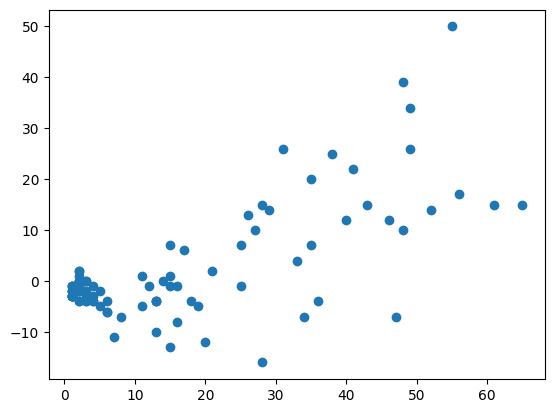

In [574]:
plt.scatter(x=net_win["大场数"],y=net_win["净胜数"])

In [584]:
import plotly.graph_objs as go
import numpy as np

# Offset to prevent overlapping of names (optional)
offset_increment = 0.1  # Adjust as needed
offsets = np.linspace(-offset_increment, offset_increment, len(net_win))

# Create the scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=net_win["大场数"] + offsets,  # Offset added to avoid overlap
    y=net_win["净胜数"] + offsets,
    mode='markers+text',
    text=net_win["姓名"],  # Label points with player names
    textposition='top center',
    marker=dict(
        size=12,
        color=net_win["大场胜率"],  # Use winrate for coloring
        colorscale='Plasma_r',  # Color scale to represent winrate
        cmin=net_win["大场胜率"].min(),
        cmax=net_win["大场胜率"].max(),
        showscale=True,  # Show color bar
        colorbar=dict(
            title="Winrate",
            titleside='right',
            titlefont=dict(size=14),
            tickvals=np.linspace(net_win["大场胜率"].min(), net_win["大场胜率"].max(), 5),
            tickfont=dict(size=12),
            lenmode='fraction',
            len=0.5  # Adjust the length of the color bar
        )
    ),
    showlegend=False
))

# Add a diagonal line (optional, for context or symmetry)
min_range = min(net_win["大场数"].min(), net_win["净胜数"].min()) - 1
max_range = max(net_win["大场数"].max(), net_win["净胜数"].max()) + 1

# Add the diagonal 45-degree line
fig.add_trace(go.Scatter(
    x=[min_range, max_range],  # x values for the diagonal
    y=[0,0],  # y values for the diagonal (same as x for 45 degrees)
    mode='lines',
    line=dict(color='red', dash='dash'),
))

# Update the layout
fig.update_layout(
    title='大场数 vs 净胜数 with Winrate Coloring',
    xaxis=dict(title='大场数', range=[net_win["大场数"].min() - 1, net_win["大场数"].max() + 1]),
    yaxis=dict(title='净胜数', range=[net_win["净胜数"].min() - 1, net_win["净胜数"].max() + 1]),
    template='plotly_white',
    height=800,
    width=1000,
)

# Show the interactive plot
fig.show()


In [597]:
# 替换 Y 轴为场均净胜
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=net_win["大场胜率"],
    y=net_win["场均净胜"],
    mode='markers+text',
    text=net_win["姓名"],
    textposition='top center',
    marker=dict(
        size=12,
        color=net_win["大场数"],  # 颜色仍然使用大场胜率
        colorscale='Plasma_r',
        cmin=net_win["大场数"].min(),
        cmax=net_win["大场数"].max(),
        showscale=True,
        colorbar=dict(
            title="大场数",
            titleside='right',
            titlefont=dict(size=14),
            tickvals=np.linspace(net_win["大场数"].min(), net_win["大场数"].max(), 5),
            tickfont=dict(size=12),
            lenmode='fraction',
            len=0.5
        )
    ),
    showlegend=False
))

fig.add_trace(go.Scatter(
    x=[min_range, max_range],  # x values for the diagonal
    y=[0,0],  # y values for the diagonal (same as x for 45 degrees)
    mode='lines',
    line=dict(color='red', dash='dash'),
))


fig.add_trace(go.Scatter(
    x=[0.5,0.5],  # x values for the diagonal
    y=[min_range, max_range],  # y values for the diagonal (same as x for 45 degrees)
    mode='lines',
    line=dict(color='red', dash='dash'),
))


# 更新布局
fig.update_layout(
    title='大场胜率 vs 场均净胜 with Coloring',
    xaxis=dict(title='大场胜率'),
    yaxis=dict(title='场均净胜'),
    template='plotly_white',
    height=800,
    width=1000,
)

fig.show()


In [598]:
import plotly.graph_objs as go
import numpy as np

# Define ranges for diagonal lines
x_min, x_max = net_win["大场胜率"].min(), net_win["大场胜率"].max()
y_min, y_max = net_win["场均净胜"].min(), net_win["场均净胜"].max()

# Create the figure
fig = go.Figure()

# Scatter plot for players
fig.add_trace(go.Scatter(
    x=net_win["大场胜率"],
    y=net_win["场均净胜"],
    mode='markers+text',
    text=net_win["姓名"],  # Display player names
    textposition='top center',
    marker=dict(
        size=12,
        color=net_win["大场数"],  # Use "大场数" for color scale
        colorscale='Plasma_r',
        cmin=net_win["大场数"].min(),
        cmax=net_win["大场数"].max(),
        showscale=True,
        colorbar=dict(
            title="大场数",
            titleside='right',
            titlefont=dict(size=14),
            tickvals=np.linspace(net_win["大场数"].min(), net_win["大场数"].max(), 5),
            tickfont=dict(size=12),
            lenmode='fraction',
            len=0.5
        )
    ),
    hovertemplate=(
        "姓名: %{text}<br>" +
        "大场胜率: %{x:.2f}<br>" +
        "场均净胜: %{y:.2f}<br>" +
        "大场数: %{marker.color}<extra></extra>"
    ),
    showlegend=False
))

# Add horizontal line (场均净胜 = 0)
fig.add_trace(go.Scatter(
    x=[x_min, x_max],
    y=[0, 0],  # Horizontal line at y=0
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='场均净胜 = 0'
))

# Add vertical line (大场胜率 = 0.5)
fig.add_trace(go.Scatter(
    x=[0.5, 0.5],  # Vertical line at x=0.5
    y=[y_min, y_max],
    mode='lines',
    line=dict(color='blue', dash='dash'),
    name='大场胜率 = 0.5'
))

# Update layout
fig.update_layout(
    title='大场胜率 vs 场均净胜 with Coloring',
    xaxis=dict(title='大场胜率', range=[x_min, x_max]),
    yaxis=dict(title='场均净胜', range=[y_min, y_max]),
    template='plotly_white',
    height=800,
    width=1000,
    legend=dict(
        title="参考线",
        font=dict(size=12),
        orientation="h",
        x=0.5,
        xanchor="center",
        y=-0.2
    )
)

# Show the plot
fig.show()


In [605]:
import plotly.graph_objs as go
import numpy as np

# Define ranges for diagonal lines
x_min, x_max = net_win["大场胜率"].min(), net_win["大场胜率"].max()
y_min, y_max = net_win["小局胜率"].min(), net_win["小局胜率"].max()  # Update for 小局胜率

# Create the figure
fig = go.Figure()

# Scatter plot for players
fig.add_trace(go.Scatter(
    x=net_win["大场胜率"],
    y=net_win["小局胜率"],  # Use 小局胜率 for y-axis
    mode='markers+text',
    text=net_win["姓名"],  # Display player names
    textposition='top center',
    marker=dict(
        size=12,
        color=net_win["大场数"],  # Use "大场数" for color scale
        colorscale='Plasma_r',
        cmin=net_win["大场数"].min(),
        cmax=net_win["大场数"].max(),
        showscale=True,
        colorbar=dict(
            title="大场数",
            titleside='right',
            titlefont=dict(size=14),
            tickvals=np.linspace(net_win["大场数"].min(), net_win["大场数"].max(), 5),
            tickfont=dict(size=12),
            lenmode='fraction',
            len=0.5
        )
    ),
    hovertemplate=(
        "姓名: %{text}<br>" +
        "大场胜率: %{x:.2f}<br>" +
        "小局胜率: %{y:.2f}<br>" +
        "大场数: %{marker.color}<extra></extra>"
    ),
    showlegend=False
))

# Add horizontal line (小局胜率 = 0.5)
fig.add_trace(go.Scatter(
    x=[x_min, x_max],
    y=[x_min, x_max],  # Horizontal line at y=0.5
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='小局胜率 = 0.5'
))

# # Add vertical line (大场胜率 = 0.5)
# fig.add_trace(go.Scatter(
#     x=[0.5, 0.5],  # Vertical line at x=0.5
#     y=[y_min, y_max],
#     mode='lines',
#     line=dict(color='blue', dash='dash'),
#     name='大场胜率 = 0.5'
# ))

# Update layout
fig.update_layout(
    title='大场胜率 vs 小局胜率 with Coloring',
    xaxis=dict(title='大场胜率', range=[x_min, x_max]),
    yaxis=dict(title='小局胜率', range=[y_min, y_max]),
    template='plotly_white',
    height=800,
    width=1000,
    legend=dict(
        title="参考线",
        font=dict(size=12),
        orientation="h",
        x=0.5,
        xanchor="center",
        y=-0.2
    )
)

# Show the plot
fig.show()


In [607]:
lpl_world_bo5_match_df

,Player Name,Date,Game,Tournament,Type,Defeat,Victory,Win,net_win
49,1xn,2024-08-05,OMG vs TT,LPL Summer Playoffs 2024,LPL,0,3,1,3
50,1xn,2024-08-11,FPX vs TT,LPL Summer Playoffs 2024,LPL,3,2,0,-1
65,369,2019-04-07,TOP vs SDG,LPL Spring Playoffs 2019,LPL,0,3,1,3
83,369,2019-09-01,Top Esports vs RNG,LPL Summer Playoffs 2019,LPL,3,1,0,-2
84,369,2019-09-04,BLG vs Top Esports,LPL Summer Playoffs 2019,LPL,0,3,1,3
...,...,...,...,...,...,...,...,...,...
16119,xiaohu,2024-08-30,BLG vs WBG,LPL Summer Playoffs 2024,LPL,3,0,0,-3
16120,xiaohu,2024-08-31,WBG vs LNG Esports,LPL Regional Finals 2024,LPL,3,0,0,-3
16121,xiaohu,2024-09-02,WBG vs JD Gaming,LPL Regional Finals 2024,LPL,2,3,1,1
16127,xiaohu,2024-10-17,LNG Esports vs WBG,Worlds Main Event 2024,Worlds,1,3,1,2


In [610]:
def classify_match_type(net_win):
    if net_win >= 2:
        return "大比分获胜"
    elif net_win == 1:
        return "险胜"
    elif net_win == -1:
        return "惜败"
    elif net_win <= -2:
        return "大比分失败"
    else:
        return "未知"

match_type = lpl_world_bo5_match_df.copy()

match_type["Match Type"] = match_type["net_win"].apply(classify_match_type)

match_type

,Player Name,Date,Game,Tournament,Type,Defeat,Victory,Win,net_win,Match Type
49,1xn,2024-08-05,OMG vs TT,LPL Summer Playoffs 2024,LPL,0,3,1,3,大比分获胜
50,1xn,2024-08-11,FPX vs TT,LPL Summer Playoffs 2024,LPL,3,2,0,-1,惜败
65,369,2019-04-07,TOP vs SDG,LPL Spring Playoffs 2019,LPL,0,3,1,3,大比分获胜
83,369,2019-09-01,Top Esports vs RNG,LPL Summer Playoffs 2019,LPL,3,1,0,-2,大比分失败
84,369,2019-09-04,BLG vs Top Esports,LPL Summer Playoffs 2019,LPL,0,3,1,3,大比分获胜
...,...,...,...,...,...,...,...,...,...,...
16119,xiaohu,2024-08-30,BLG vs WBG,LPL Summer Playoffs 2024,LPL,3,0,0,-3,大比分失败
16120,xiaohu,2024-08-31,WBG vs LNG Esports,LPL Regional Finals 2024,LPL,3,0,0,-3,大比分失败
16121,xiaohu,2024-09-02,WBG vs JD Gaming,LPL Regional Finals 2024,LPL,2,3,1,1,险胜
16127,xiaohu,2024-10-17,LNG Esports vs WBG,Worlds Main Event 2024,Worlds,1,3,1,2,大比分获胜


In [658]:
# 统计每个选手的总比赛场次和惜败场次
loss_analysis = df.groupby("Player Name").agg(
    Total_Matches=("Match Type", "count"),  # 总比赛数
    Narrow_Losses=("Match Type", lambda x: (x == "惜败").sum())  # 惜败场次
).reset_index()

# 计算惜败比例
loss_analysis["Narrow_Loss_Ratio"] = loss_analysis["Narrow_Losses"] / loss_analysis["Total_Matches"]


# 按惜败比例降序排序，找到惜败比例最高的选手
loss_analysis = loss_analysis[loss_analysis["Total_Matches"] >= 5].sort_values(by="Narrow_Loss_Ratio", ascending=False)

loss_analysis.columns = ["选手","BO5局数","2:3惜败次数","惜败比例"]
loss_analysis.head(5)

,选手,BO5局数,2:3惜败次数,惜败比例
3,Able,8,3,0.375000
2,AKi,11,4,0.363636
87,shanji,15,5,0.333333
13,Creme,19,6,0.315789
79,Zika,13,4,0.307692


In [659]:
# 统计每个选手的总比赛场次和险胜场次
win_analysis = df.groupby("Player Name").agg(
    Total_Matches=("Match Type", "count"),  # 总比赛数
    Narrow_Wins=("Match Type", lambda x: (x == "险胜").sum())  # 险胜场次
).reset_index()

# 计算险胜比例
win_analysis["Narrow_Win_Ratio"] = win_analysis["Narrow_Wins"] / win_analysis["Total_Matches"]


# 查看结果
win_analysis= win_analysis[win_analysis["Total_Matches"] >= 5].sort_values(by="Narrow_Win_Ratio", ascending=False)

win_analysis.columns = ["选手","BO5局数","3:2险胜次数","险胜比例"]
win_analysis.head(5)


,选手,BO5局数,3:2险胜次数,险胜比例
77,Zdz,5,3,0.600000
45,Meteor,5,2,0.400000
12,Care,6,2,0.333333
40,Leyan,13,4,0.307692
89,xiaohu,65,19,0.292308


In [661]:
scat_df = win_analysis.merge(loss_analysis, on=("选手","BO5局数"))

In [663]:
import plotly.graph_objs as go
import numpy as np

# Calculate averages
avg_close_victory_ratio = scat_df["险胜比例"].mean()
avg_narrow_defeat_ratio = scat_df["惜败比例"].mean()

# Define ranges
x_min, x_max = scat_df["险胜比例"].min(), scat_df["险胜比例"].max()
y_min, y_max = scat_df["惜败比例"].min(), scat_df["惜败比例"].max()

# Create the figure
fig = go.Figure()

# Add scatter plot
fig.add_trace(go.Scatter(
    x=scat_df["险胜比例"],
    y=scat_df["惜败比例"],
    mode='markers+text',
    text=scat_df["选手"],  # Player names
    textposition='top center',
    marker=dict(
        size=12,
        color=scat_df["BO5局数"],  # Use "大场胜率" for coloring
        colorscale='Plasma_r',
        cmin=scat_df["BO5局数"].min(),
        cmax=scat_df["BO5局数"].max(),
        showscale=True,
        colorbar=dict(
            title="BO5局数",
            titleside='right',
            titlefont=dict(size=14),
            tickvals=np.linspace(scat_df["BO5局数"].min(), scat_df["BO5局数"].max(), 5),
            tickfont=dict(size=12),
            lenmode='fraction',
            len=0.5
        )
    ),
    hovertemplate=(
        "姓名: %{text}<br>" +
        "险胜比例: %{x:.2f}<br>" +
        "惜败比例: %{y:.2f}<br>" +
        "BO5局数: %{marker.color:.2f}<extra></extra>"
    ),
    showlegend=False
))

# Add vertical line for average close victory ratio
fig.add_trace(go.Scatter(
    x=[avg_close_victory_ratio, avg_close_victory_ratio],
    y=[y_min, y_max],
    mode='lines',
    line=dict(color='blue', dash='dash'),
    name='平均险胜比例'
))

# Add horizontal line for average narrow defeat ratio
fig.add_trace(go.Scatter(
    x=[x_min, x_max],
    y=[avg_narrow_defeat_ratio, avg_narrow_defeat_ratio],
    mode='lines',
    line=dict(color='green', dash='dash'),
    name='平均惜败比例'
))

# Update layout
fig.update_layout(
    title="险胜比例 vs 惜败比例 (Scatter Plot)",
    xaxis=dict(title="险胜比例", range=[x_min, x_max]),
    yaxis=dict(title="惜败比例", range=[y_min, y_max]),
    template="plotly_white",
    height=800,
    width=1000,
    legend=dict(
        title="参考线",
        font=dict(size=12),
        orientation="h",
        x=0.5,
        xanchor="center",
        y=-0.2
    )
)

# Show the plot
fig.show()


In [616]:
# 按选手统计比赛总数
df = match_type
top_players = df.groupby("Player Name").size().reset_index(name="Total Matches")

# 按比赛总数降序排序，并选择前 20 名
top_20_players = top_players.sort_values(by="Total Matches", ascending=False).head(20)

# 从原始数据中筛选出这些选手的数据
top_20_data = df[df["Player Name"].isin(top_20_players["Player Name"])]

# 按选手和比赛类型分组，统计比赛数
stacked_data_top20 = top_20_data.groupby(["Player Name", "Match Type"]).size().reset_index(name="Count")

# 绘制堆叠柱状图
fig = px.bar(
    stacked_data_top20,
    x="Player Name",
    y="Count",
    color="Match Type",
    title="Top 20 Players by Match Numbers - Match Type Distribution",
    labels={"Count": "Match Count", "Player Name": "Player", "Match Type": "Match Type"},
    barmode="stack",
    height=600,
    width=1000,
)

# 调整布局
fig.update_layout(
    xaxis=dict(title="Player", tickangle=-45),
    yaxis=dict(title="Total Matches"),
    legend_title="Match Type",
    template="plotly_white"
)

# 显示图表
fig.show()


In [633]:
BO5_summary["duration_per_match"] = BO5_summary["Duration_minute"] / BO5_summary["Number of Matches"]
BO5_summary

,Player Name,Number of Games,Duration,Number of Matches,Match Win Rate,Duration_minute,number_of_game_won,game_win_rate,duration_per_match
0,xiaohu,271,6 days 07:10:12,65,0.630769,9070.200000,143,0.527675,139.541538
1,meiko,251,5 days 19:09:52,61,0.540984,8349.866667,133,0.529880,136.883060
2,JackeyLove,231,5 days 04:58:29,56,0.535714,7498.483333,124,0.536797,133.901488
3,Knight,224,4 days 23:46:59,55,0.690909,7186.983333,137,0.611607,130.672424
4,Scout,218,5 days 01:33:14,52,0.557692,7293.233333,116,0.532110,140.254487
...,...,...,...,...,...,...,...,...,...
85,Hery,3,0 days 01:14:43,1,0.000000,74.716667,0,0.000000,74.716667
86,Jwei,3,0 days 01:39:12,1,0.000000,99.200000,0,0.000000,99.200000
87,Vicla,3,0 days 01:39:12,1,0.000000,99.200000,0,0.000000,99.200000
88,Assum,3,0 days 01:39:12,1,0.000000,99.200000,0,0.000000,99.200000


In [637]:
import plotly.graph_objs as go
import numpy as np

# 计算比赛胜率和每场比赛的平均时长
net_win["Match Win Rate"] = net_win["大场胜率"]  # 假设大场胜率已计算为比赛胜率
net_win["Duration Per Match"] = net_win["总时长(分钟)"] / net_win["大场数"]  # 每场比赛的平均时长

# 计算平均值
avg_match_win_rate = net_win["Match Win Rate"].mean()
avg_duration_per_match = net_win["Duration Per Match"].mean()

# 定义X轴和Y轴的范围
x_min, x_max = net_win["Duration Per Match"].min(), net_win["Duration Per Match"].max()
y_min, y_max = net_win["Match Win Rate"].min(), net_win["Match Win Rate"].max()

# 创建散点图
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=net_win["Duration Per Match"],  # X轴：场均时长
    y=net_win["Match Win Rate"],      # Y轴：比赛胜率
    mode='markers+text',
    text=net_win["姓名"],  # 显示选手姓名
    textposition='top center',
    marker=dict(
        size=12,
        color=net_win["大场数"],  # 使用大场数作为颜色的依据
        colorscale='Plasma_r',
        cmin=net_win["大场数"].min(),
        cmax=net_win["大场数"].max(),
        showscale=True,
        colorbar=dict(
            title="大场数",
            titleside='right',
            titlefont=dict(size=14),
            tickvals=np.linspace(net_win["大场数"].min(), net_win["大场数"].max(), 5),
            tickfont=dict(size=12),
            lenmode='fraction',
            len=0.5
        )
    ),
    hovertemplate=(
        "姓名: %{text}<br>" +
        "场均时长: %{x:.2f} 分钟<br>" +
        "比赛胜率: %{y:.2f}<br>" +
        "大场数: %{marker.color}<extra></extra>"
    ),
    showlegend=False
))

# 添加 X 轴参考线（场均时长平均值）
fig.add_trace(go.Scatter(
    x=[avg_duration_per_match, avg_duration_per_match],
    y=[y_min, y_max],
    mode='lines',
    line=dict(color='green', dash='dash'),
    name='平均场均时长'
))

# 添加 Y 轴参考线（比赛胜率平均值）
fig.add_trace(go.Scatter(
    x=[x_min, x_max],
    y=[avg_match_win_rate, avg_match_win_rate],
    mode='lines',
    line=dict(color='blue', dash='dash'),
    name='平均比赛胜率'
))

# 更新图表布局
fig.update_layout(
    title="场均时长 vs 大场胜率",
    xaxis=dict(title="场均时长 (minutes)", range=[x_min, x_max]),
    yaxis=dict(title="大场胜率", range=[y_min, y_max]),
    template="plotly_white",
    height=800,
    width=1000,
    legend=dict(
        title="参考线",
        font=dict(size=12),
        orientation="h",
        x=0.5,
        xanchor="center",
        y=-0.2
    )
)

# 显示图表
fig.show()


In [650]:
lpl_df_original.loc[
    (lpl_df_original["Player Name"] == "Tian") & 
    (lpl_df_original["Tournament"].str.contains("Playoffs.*2019", regex=True, na=False))
]


,Champion,Result,Score,Build,Duration,Date,Game,Tournament,Player Name,Player ID,Season,Split
27945,Lee Sin,Victory,3/1/8,NaN,29:32,2019-04-17,FPX vs TOP,LPL Spring Playoffs 2019,Tian,1269,S9,Spring
27946,Lee Sin,Victory,7/1/5,NaN,23:46,2019-04-17,FPX vs TOP,LPL Spring Playoffs 2019,Tian,1269,S9,Spring
27947,RekSai,Victory,10/0/6,NaN,29:53,2019-04-17,FPX vs TOP,LPL Spring Playoffs 2019,Tian,1269,S9,Spring
27948,Kindred,Defeat,1/2/4,NaN,29:10,2019-04-17,FPX vs TOP,LPL Spring Playoffs 2019,Tian,1269,S9,Spring
27949,Jarvan IV,Defeat,1/3/9,NaN,37:50,2019-04-13,FPX vs JD Gaming,LPL Spring Playoffs 2019,Tian,1269,S9,Spring
27950,Nocturne,Defeat,4/5/5,NaN,35:22,2019-04-13,FPX vs JD Gaming,LPL Spring Playoffs 2019,Tian,1269,S9,Spring
27951,RekSai,Victory,5/1/6,NaN,26:39,2019-04-13,FPX vs JD Gaming,LPL Spring Playoffs 2019,Tian,1269,S9,Spring
27952,Olaf,Victory,2/1/8,NaN,39:30,2019-04-13,FPX vs JD Gaming,LPL Spring Playoffs 2019,Tian,1269,S9,Spring
28009,Elise,Victory,3/3/5,NaN,42:31,2019-09-06,FPX vs RNG,LPL Summer Playoffs 2019,Tian,1269,S9,Summer
28010,Elise,Victory,0/2/3,NaN,38:33,2019-09-06,FPX vs RNG,LPL Summer Playoffs 2019,Tian,1269,S9,Summer


In [642]:
lpl_world_bo5_match_df[lpl_world_bo5_match_df["Player Name"] == "Tian"]

,Player Name,Date,Game,Tournament,Type,Defeat,Victory,Win,net_win
11567,Tian,2019-04-17,FPX vs TOP,LPL Spring Playoffs 2019,LPL,1,3,1,2
11587,Tian,2019-08-31,FPX vs BLG,LPL Summer Playoffs 2019,LPL,1,3,1,2
11588,Tian,2019-09-06,FPX vs RNG,LPL Summer Playoffs 2019,LPL,1,3,1,2
11596,Tian,2019-10-26,FPX vs Fnatic,World Championship 2019,Worlds,1,3,1,2
11597,Tian,2019-11-02,IG vs FPX,World Championship 2019,Worlds,1,3,1,2
11598,Tian,2019-11-10,G2 Esports vs FPX,World Championship 2019,Worlds,0,3,1,3
11615,Tian,2020-04-25,FPX vs EDG,LPL Spring Playoffs 2020,LPL,1,3,1,2
11616,Tian,2020-04-27,JD Gaming vs FPX,LPL Spring Playoffs 2020,LPL,3,0,0,-3
11617,Tian,2020-04-29,IG vs FPX,LPL Spring Playoffs 2020,LPL,0,3,1,3
11621,Tian,2020-05-30,JD Gaming vs FPX,Mid-Season Cup 2020,Worlds,1,3,1,2


In [27]:
lpl_world_bo5_game_df.to_csv("lpl_world_bo5_game_df.csv")


In [30]:
lpl_world_bo5_match_df.to_csv("lpl_world_bo5_match_df.csv")